In [35]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [36]:
"""
CHUNK_SIZE = 1000 # Number of rows to read at a time
header_written = False

with open("behavior_log.csv", "r") as in_file:
    reader = csv.reader(in_file)
    header = next(reader)

    with open("buy_behavior_log.csv", "a", newline='') as out_file:
        writer = csv.writer(out_file)
        if not header_written:
            writer.writerow(header)
            header_written = True

        chunk = []
        for i, row in enumerate(reader):
            if row[2] == "buy":
                chunk.append(row)
            if (i + 1) % CHUNK_SIZE == 0:
                writer.writerows(chunk)
                chunk = []
        writer.writerows(chunk)
#In this code, the CHUNK_SIZE variable determines the number of rows to be read and processed at a time.
# Use this code to generate buy_behaviour_log.csv file.
"""


'\nCHUNK_SIZE = 1000 # Number of rows to read at a time\nheader_written = False\n\nwith open("behavior_log.csv", "r") as in_file:\n    reader = csv.reader(in_file)\n    header = next(reader)\n\n    with open("buy_behavior_log.csv", "a", newline=\'\') as out_file:\n        writer = csv.writer(out_file)\n        if not header_written:\n            writer.writerow(header)\n            header_written = True\n\n        chunk = []\n        for i, row in enumerate(reader):\n            if row[2] == "buy":\n                chunk.append(row)\n            if (i + 1) % CHUNK_SIZE == 0:\n                writer.writerows(chunk)\n                chunk = []\n        writer.writerows(chunk)\n#In this code, the CHUNK_SIZE variable determines the number of rows to be read and processed at a time.\n# Use this code to generate buy_behaviour_log.csv file.\n'

In [37]:
#ad_feature = pd.read_csv('PycharmProjects/SPML/ad_feature.csv')
ad_feature = pd.read_csv('ad_feature.csv')

In [38]:
#raw_sample = pd.read_csv('PycharmProjects/SPML/raw_sample.csv')
raw_sample = pd.read_csv('raw_sample.csv')

In [39]:
#user_behavior_log = pd.read_csv('PycharmProjects/SPML/buy_behavior_log.csv')
buy_behavior = pd.read_csv('buy_behavior_log.csv')


In [54]:
#user_profile = pd.read_csv('PycharmProjects/SPML/user_profile.csv')
user_profile = pd.read_csv('user_profile.csv')

unique_age_levels = user_profile["age_level"].unique()

# Print the unique values of age_level
print(unique_age_levels)

[5 2 4 6 3 1 0]


In [41]:
clicks_brand = pd.merge(raw_sample, ad_feature[['brand', 'adgroup_id']], how='left', on='adgroup_id')

In [42]:
print(user_profile)

print(buy_behavior)

          userid  cms_segid  cms_group_id  final_gender_code  age_level  \
0            234          0             5                  2          5   
1            523          5             2                  2          2   
2            612          0             8                  1          2   
3           1670          0             4                  2          4   
4           2545          0            10                  1          4   
...          ...        ...           ...                ...        ...   
1061763  1137955          0             3                  2          3   
1061764  1138545          0             4                  2          4   
1061765  1138902         67             9                  1          3   
1061766  1139632          0             7                  1          1   
1061767  1139870          8             2                  2          2   

         pvalue_level  shopping_level  occupation  new_user_class_level   
0                 NaN   

In [43]:
clicks_with_brand = pd.merge(left=raw_sample, right=ad_feature, how='inner', on='adgroup_id')

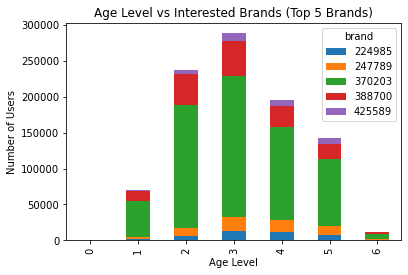

In [53]:
clicks_user_brand = pd.merge(clicks_brand, user_profile[['final_gender_code', 'age_level', 'userid']], how='left',
                             left_on='user', right_on='userid')
#filter out columns not required
#join columns with behavior log and user datasets

top_5_brands = buy_behavior['brand'].value_counts().head(5).index.tolist()
top_5_buy_behavior = buy_behavior[buy_behavior['brand'].isin(top_5_brands)]

# Merge the top_5_buy_behavior and user_profile dataframes on the 'userid' column
merged_df = pd.merge(top_5_buy_behavior, user_profile, left_on='user', right_on='userid')

# Group the merged dataframe by the 'age_level' and 'brand' columns and get the count of each group
grouped_df = merged_df.groupby(['age_level', 'brand'], as_index=False).count()[['age_level', 'brand', 'user']]

# Pivot the grouped dataframe to create a pivot table with the 'age_level' column as the index, the 'brand' column as the columns and the 'user' column as the values
pivot_table = grouped_df.pivot(index='age_level', columns='brand', values='user')


# Plot the pivot table as a bar plot
pivot_table.plot(kind='bar', stacked=True)

# Add labels to the x and y axis and add a title to the plot
plt.xlabel('Age Level')
plt.ylabel('Number of Users')
plt.title('Age Level vs Interested Brands (Top 5 Brands)')

# Show the plot
plt.show()













In [45]:
###### Following is a table generated that shows for top 5 brands how each age group interacts with each brand #########
##### Using this information we can create dummy figure 4  #####


# Get the total number of users for each age level
age_level_totals = pivot_table.sum(axis=1)

# Divide the values in the pivot table by the age level totals and multiply by 100 to get the percent values
percent_table = (pivot_table / age_level_totals.values.reshape(-1, 1)) * 100

# Round the values in the percent table to 2 decimal places
percent_table = percent_table.round(2)

# Print the percent table
print(percent_table)

brand      224985  247789  370203  388700  425589
age_level                                        
0            6.28   11.11   56.04   14.01   12.56
1            2.24    4.89   71.22   19.38    2.27
2            2.81    4.54   71.95   18.30    2.41
3            4.42    6.77   68.26   16.80    3.75
4            5.81    8.75   65.97   14.71    4.77
5            5.45    8.27   65.79   15.09    5.40
6            6.18   10.41   60.36   15.65    7.40


In [47]:
brands = clicks_user_brand.brand.unique()

In [48]:
print((clicks_user_brand.age_level.unique()))
age_levels = [x for x in clicks_user_brand.age_level.unique() if x==x]
age_levels.sort()
print(age_levels)

[ 2. nan  5.  3.  4.  6.  1.  0.]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]


In [49]:
print(len(brands))

99815


In [50]:
print(len(brands))

99815


In [51]:
#brand_id : [count of brand query for each age group]
#debug
brand_count = {}
for brand in brands[:2]:
    print(brand)
    brand_clicks = clicks_user_brand.loc[clicks_user_brand['brand'] == brand]
    total_queries = brand_clicks[brand_clicks['age_level'].isin(age_levels)].shape[0]
    age_perc_list =[]
    for age_level in age_levels:
        queries_from_age = clicks_user_brand.loc[clicks_user_brand['age_level'] == age_level].shape[0]
        age_percentage = (queries_from_age/total_queries)*100
        age_perc_list.append(age_percentage)
    brand_count[brand = age_perc_list]
    

SyntaxError: invalid syntax (<ipython-input-51-d128c773e28c>, line 13)

In [ ]:
print(brand_count)